<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Well-documented, Demonstration Python Workflows 

### k-means Clustering for Interential Machine Learning

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

By Michael J. Pyrcz <br />
&copy; Copyright 2024. 

This is a tutorial for / demonstration of **k-means Clustering for Interential Machine Learning**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Cluster Analysis](https://youtu.be/oFE10cLl0Fs?si=AwmYnrYggtYWGV2n)
* [Issues with k-Means Clustering](https://youtu.be/ysJw8M_J40I?si=EIlg2941QrfAt7zE)
* [Density-based Clustering](https://www.youtube.com/watch?v=3GaLe8HaDMc&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=15)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Cluster Analysis

We need to learn and segment distinct populations to improve our prediction models. 

* Mixing distinct populations to train prediction models often reduces model accuracy.

* Clustering is an inferential machine learning method to automate the segmentation of the dataset into separate groups, known as clusters and specified by an integer index.

* The computer does not provide meaning nor description of the groups, that is our job!

#### Inferential Machine Learning

There are no response features, $y$, just predictor features,

$$
𝑋_1,\ldots,𝑋_𝑚
$$

* Machine learns by mimicry a compact representation of the data
* Captures patterns as feature projections, group assignments, neural network latent features, etc.
* We focus on inference of the population, the natural system, instead of prediction of response features.

#### k-Means Clustering

The K-means clustering approach is primaryly applied as an unsupervised method for classification:

* **Prototype Method** - represents the training data with number of synthetic cases in the features space. For K-means clustering we assign and iteratively update $K$ prototypes.

* **Iterative Solution** - the initial prototypes are assigned randomly in the feature space, the labels for each training sample are updated to the nearest prototype, then the prototypes are adjusted to the centroid of their assigned training data, repeat until there is no further update to the training data assignments.

* **Unsupervised Learning** - the training data are not labeled and are assigned $K$ labels based on their proximity to the prototypes in the feature space.  The idea is that similar things, proximity in feature space, should belong to the same category.  

* **Feature Weighting** - the procedure depends on the 'distance' between training samples and prototypes in feature space.  Distance is treated as the 'inverse' of similarity. If the features have significantly different magnitudes, the feature(s) with the largest magnitudes and ranges will dominate the process.  One approach is to sandardize / normalize the variables.  Also, by-feature weighting may be applied.  In this demonstration we normalize the features to range from 0.0 to 1.0.

* Supervised Learning Variant for Classification of the Feature Space - applies multiple prototypes in each category to then constructs a decision boundary based on nearest prototype.  More prototypes per category results in a more complicated decision boundary in the feature space.  

#### The k-Means Clustering Demonstration

Here's a simple workflow, demonstration of k-means clustering for subsurface modeling workflows. Initially I use functions to train k-means clustering 'by-hand' and then I demonstrate the approach with the scikit-learn Python package function. This should help you get started with inferential methods to find patterns in your subsurface data sets and the concept of a heuristic solution.

* **Heuristic** - a shortcut the sacrifices accuracy for practicality, i.e., the solution is usually good enough and has a reasoanble run time. 

For the k-means clustering problem of assigning one of $k$ categorical labels to $n$ sample data, the solution space includes,

$$
k^n
$$

possible solutions.

The k-means clustering solution includes these steps:

1. assign initial random prototype with labels
2. assign samples to the nearest prototype label
3. update prototype based on centroids of samples belonging to this prototype
4. iterate (return to step 2) until no sample assignments change (prototypes stop moving)

This allows us to be able to watch the method in action, as opposed to just getting a result.  I think this is more instructive.

Note, for this workflow I have modified code from the tutorial provided by Ben Keen as functions to take care of the steps (assign training data to the nearest prototype, update the prototype to the centroid of the assigned data).  The original tutorial is available at [here](http://benalexkeen.com/k-means-clustering-in-python). All I did was specify the method to my data example for clarity, and include the normalized and original data. Appreciation to Ben!

#### Load the required libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [1]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrys for gridded data
import pandas as pd                                           # DataFrames for tabular data
import copy                                                   # for deep copies
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
import matplotlib.ticker as mtick                             # control tick label formatting
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed

#### Declare Functions

The following functions perform the steps required by K-means clustering.

* assign the training data to the nearest prototype

* update the prototype to the centroid of the assigned training data

Don't be concerned if you don't understand the code, we have used some advanced approaches for the benefit of concise code.

I also added a convenience function to add major and minor gridlines to improve plot interpretability.

In [2]:
# Assignment function to assigned training data to the nearest prototype (code modified from Ben Keen, http://benalexkeen.com/k-means-clustering-in-python/)
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (                  # use the normalized features and centroids
            np.sqrt(
                (df['Norm_Porosity'] - centroids[i][2]) ** 2
                + (df['Norm_AI'] - centroids[i][3]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return

# Update function to shift the prototype to the centroid of the training data assigned to the prototype (code modified from Ben Keen, http://benalexkeen.com/k-means-clustering-in-python/)
def update(df,centroids,x1min,x1max,x2min,x2max):
    for i in centroids.keys():
        centroids[i][2] = np.mean(df[df['closest'] == i]['Norm_Porosity'])
        centroids[i][3] = np.mean(df[df['closest'] == i]['Norm_AI'])
        centroids[i][0] = centroids[i][2] * (x1max-x1min) + x1min
        centroids[i][1] = centroids[i][3] * (x2max-x2min) + x2min
    return

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [3]:
#os.chdir("C:/PGE383")                                        # set the working directory with the input data file

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

Let's load the provided multivariate, spatial dataset '12_sample_data.csv'. It is a comma delimited file with: 

* X and Y coordinates ($m$)
* facies 0 and 1 
* porosity (fraction)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$). 

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specficy the name / variable representing that new object.

```python
df = pd.read_csv("12_sample_data.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

We do this to reduce the number of data for ease of visualization (hard to see if too many points on our plots).

In [4]:
#df = pd.read_csv('12_sample_data.csv')                       # load our data table from the current directory
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv') # or from GtiHub
df = df.iloc[:,1:]                                            # remove a null column 
df = df.sample(frac=.30, random_state = seed); df = df.reset_index(drop=True) # extract 30% random to reduce the number of data

#### Summary Statistics for Tabular Data

The table includes porosity (fraction) and acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$) that we will work with in the demonstration below.

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [5]:
df.describe().transpose()                                     # DataFrame summary statistics

,count,mean,std,min,25%,50%,75%,max
X,144.0,390.555556,256.279944,0.000000,197.500000,350.000000,550.000000,970.000000
Y,144.0,508.847222,286.151271,49.000000,250.000000,539.000000,759.000000,989.000000
Facies,144.0,0.618056,0.487559,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,144.0,0.191045,0.031262,0.133681,0.165889,0.185460,0.220655,0.261091
Perm,144.0,568.892892,1265.582175,0.035608,9.382939,64.000905,425.323240,7452.343369
AI,144.0,3749.924448,821.100292,1746.387548,3131.159498,3686.800017,4292.981182,5725.525232


#### Normalize the Features

The two features are quite incompatible.  They have dramatically different:

* variances / ranges

We should normalize each feature to range between 0 to 1. The equation is:

$$
x_i^{\prime} = \frac{ \left( x_i - min(x) \right)}{\left( max(x) - min(x) \right)} \quad i = 1,\ldots,n
$$

* This is a distribution, shift, stretch or squeze without any distribution shape change.

Now we can use these normalized values for calculating distance in our workflow:

* to remove the influence of magnitude and range on our similarity calculation

In [6]:
pormin = df['Porosity'].min(); pormax = df['Porosity'].max()  # find min and max for each feature
AImin = df['AI'].min(); AImax = df['AI'].max()

df['Norm_Porosity'] = (df['Porosity']-pormin)/(pormax - pormin) # normalize each feature, this broadcasts over all samples in the DataFrame
df['Norm_AI'] = (df['AI']-AImin)/(AImax - AImin)                            # and appends a new normalized feature for each 

Of course there is a normalize function in scikit-learn, but we did this 'by-hand' this first time to ensure the operation is perfectly clear.

````python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
````

Let's confirm that our normalized porosity and acoustic impedance now range between 0 and 1.

In [7]:
df.describe().transpose()                                     # summary statistics for the DataFrame

,count,mean,std,min,25%,50%,75%,max
X,144.0,390.555556,256.279944,0.000000,197.500000,350.000000,550.000000,970.000000
Y,144.0,508.847222,286.151271,49.000000,250.000000,539.000000,759.000000,989.000000
Facies,144.0,0.618056,0.487559,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,144.0,0.191045,0.031262,0.133681,0.165889,0.185460,0.220655,0.261091
Perm,144.0,568.892892,1265.582175,0.035608,9.382939,64.000905,425.323240,7452.343369
AI,144.0,3749.924448,821.100292,1746.387548,3131.159498,3686.800017,4292.981182,5725.525232
Norm_Porosity,144.0,0.450230,0.245367,0.000000,0.252789,0.406397,0.682631,1.000000
Norm_AI,144.0,0.503510,0.206351,0.000000,0.348008,0.487646,0.639986,1.000000


#### Extract Features of Interest

Now let's slice out the porosity and acoustic impedance features and then look at the resulting DataFrame to ensure that we loaded and reformatted as expected. 

* I often separate only the feature of interest to simplify my workflows and to reduce the probability of blunders, such as accidentally referring to a feature not being used in the current workflow!

* Beware, this is a shallow copy; therefore, any changes to the df_subset DataFrame will be reflected in the original df DataFrame. The slice is actually a reference to the original DataFrame in memory.

In [8]:
df_subset = df.iloc[:,[3,5,6,7]]                              # extract Porosity and AI for a simple 2D example
df_subset.head()                                              # preview the new DataFrame

,Porosity,AI,Norm_Porosity,Norm_AI
0,0.252772,2862.446918,0.934709,0.280478
1,0.181580,2919.237330,0.375944,0.294750
2,0.230303,2999.248935,0.758358,0.314858
3,0.163732,3823.747676,0.235860,0.522063
4,0.197078,4609.845251,0.497583,0.719618


#### Some Parameters

From the summary statistics we can assign a reasonable minimum and maximum for each feature.  

* We will use this for plotting.

We will also set the random number seed to ensure that the program does the same thing everytime it is run.

* Change the seed number for a different result

We will set the number of prototypes / clusters, *K*

We define a dictionary with the color code for each cluster, $k = 1,\ldots,K$.  Given 7 codes currently, there will be an error if $K$ is set larger than 7.  Add more color codes to the dictionary to allow for mor categories.

In [9]:
por_min = 0.12; por_max = 0.28                                # min and max values for plotting
AI_min = 1500; AI_max = 6500                                  
K = 3; max_iter = 100                                         # number of prototypes / categories
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'c', 6: 'k', 7: 'w'} # color dictionary for up to 7 categories
prototypes = np.zeros((K,max_iter,2))                         # store the protypes over interations
norm_prototypes = np.zeros((K,max_iter,2))                    # store the protypes over interations

#### Visualization of Training Data

In this exercise, we want to use K-means clustering provide facies based on acoustic impedance and porosity predictor features. 

* This allows use to group rock with similar petrophysical and geophysical properties.

Let's start by looking at the scatterplot of our training data features, porosity and acoustic impedance.  

* We will look at the data in original units and normalized units through this entire exercise.

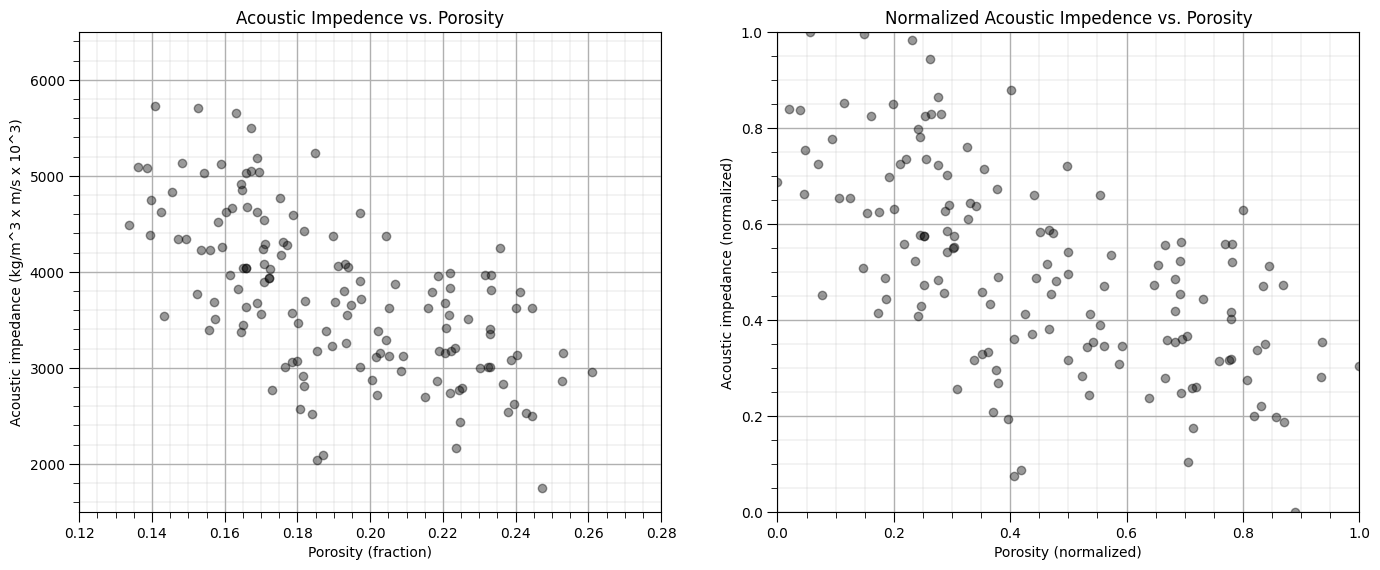

In [10]:
plt.subplot(121)                                              # scatter plot our training data 
plt.scatter(df_subset['Porosity'], df['AI'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Acoustic Impedence vs. Porosity'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid();

plt.subplot(122)                                              # scatter plot our normalized training data  
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Normalized Acoustic Impedence vs. Porosity'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim(0.0,1.0); plt.ylim(0.0,1.0); add_grid();
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Initialize k Prototypes

First we will assign k prototypes in the feature space randomly.

* for K prototypes assign a random porosity and acoustic impedance

* don't worry, these prototypes won't make much sense initially, but they will improve

We will do this and then visualize the prototypes as red, green, blue etc. dots.

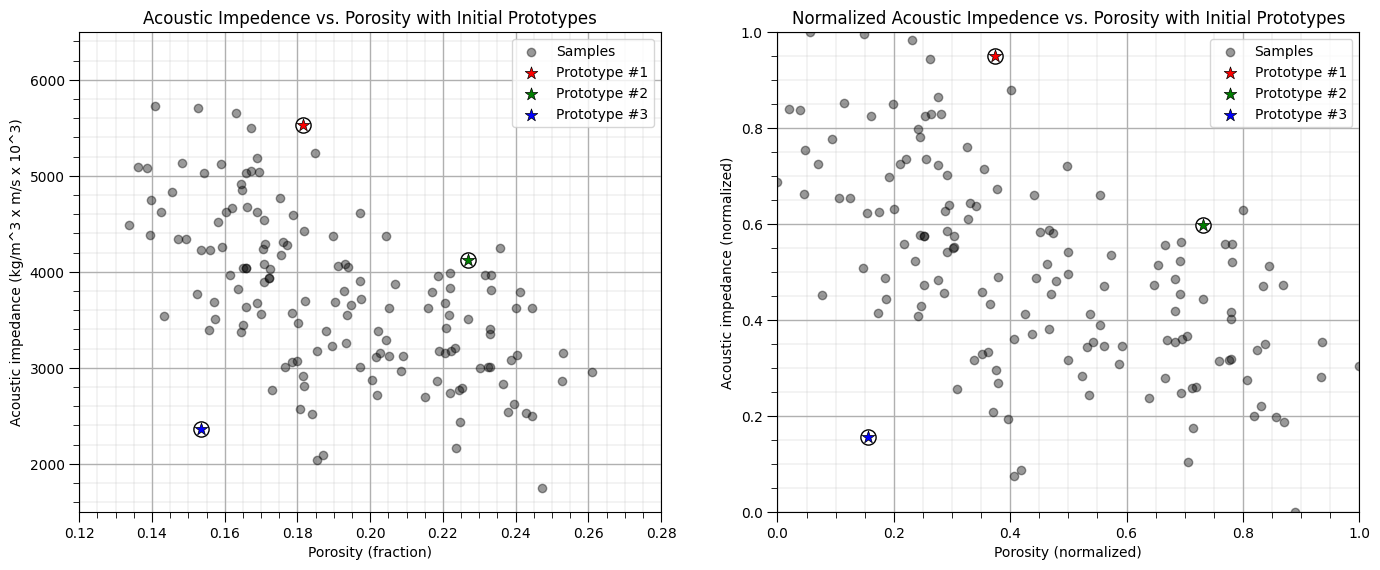

In [11]:
np.random.seed(seed)                                          # random number seed for repeatability of the results
centroids = {}
for i in range(K):                                            # Assign Initial Prototypes 
    norm_por = np.random.random(); por = norm_por * (pormax-pormin) + pormin
    norm_AI = np.random.random(); AI = norm_AI * (AImax-AImin) + AImin
    centroids[i+1] = [por,AI,norm_por,norm_AI]; prototypes[i,0] = [por,AI]; norm_prototypes[i,0] = [norm_por,norm_AI]

plt.subplot(121)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Porosity'], df['AI'],c="black",alpha = 0.4,linewidths=1.0,edgecolors="black",zorder=1,label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
plt.title('Acoustic Impedence vs. Porosity with Initial Prototypes'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

plt.subplot(122)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black",label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
plt.title('Normalized Acoustic Impedence vs. Porosity with Initial Prototypes'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Assignment of Training Data

All training data are assigned to the nearest prototype.  

* recall we have a function to do this

```python
df = assignment(df, centroids) 
```

* we work with the normalized features and visualize normalized and original features

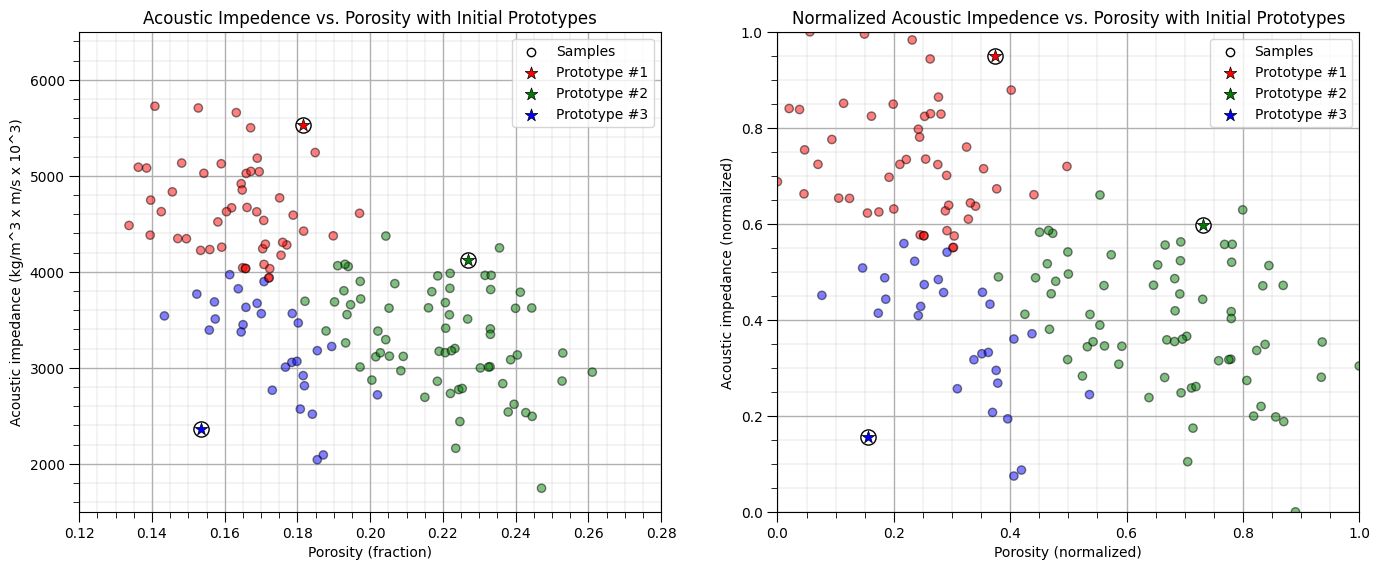

In [12]:
assignment(df, centroids)                                     # assign training data to the nearest prototype

plt.subplot(121)                                              # plot the assigned training data and K prototypes
plt.scatter(df['Porosity'], df['AI'], color=df['color'], alpha=0.5, edgecolor='k'); plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
plt.title('Acoustic Impedence vs. Porosity with Initial Prototypes'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

plt.subplot(122)                                              # plot the noramlized training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['color'], alpha = 0.5, linewidths=1.0, edgecolors="black"); plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
plt.title('Normalized Acoustic Impedence vs. Porosity with Initial Prototypes'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Update the Prototypes

Now we reassign the prototypes to the centroids of the training data belonging to each.

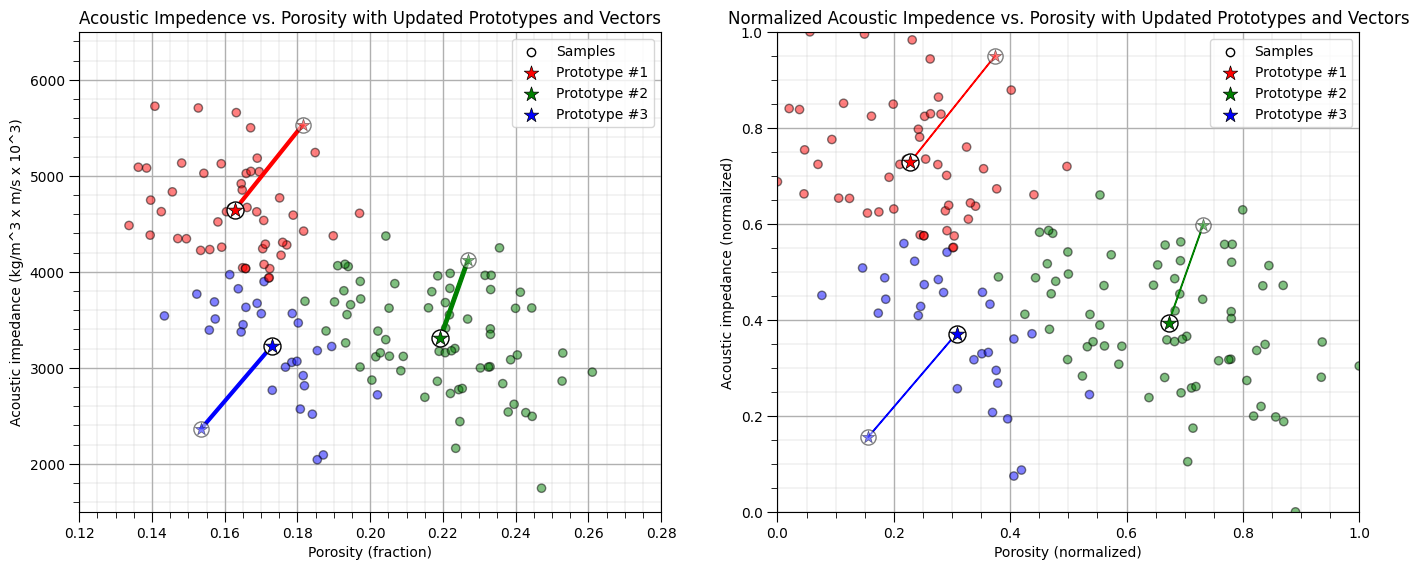

In [13]:
old_centroids = copy.deepcopy(centroids)                      # make a deep copy of the centroids for plotting vectors below
update(df,centroids,pormin,pormax,AImin,AImax)                # update the centroids to the new data assignments

plt.subplot(121)                                              # plot the assigned training data and k prototypes
ax = plt.gca()
plt.scatter(df['Porosity'], df['AI'], color=df['color'], alpha=0.5, edgecolor='k'); plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(old_centroids.get(i)[0], old_centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0,alpha=0.5,edgecolors="black",zorder=10)
    plt.scatter(old_centroids.get(i)[0], old_centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5,alpha=0.5,edgecolors="black",zorder=20)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=150,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=120,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
    prototypes[i-1,1] = [centroids[i][0],centroids[i][1]]; norm_prototypes[i-1,1] = [centroids[i][2],centroids[i][3]]
plt.title('Acoustic Impedence vs. Porosity with Updated Prototypes and Vectors'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

for i in old_centroids.keys():                                # plot the vectors
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) 
    dy = (centroids[i][1] - old_centroids[i][1]) 
    ax.arrow(old_x, old_y, dx, dy,fc=colmap[i], ec=colmap[i]); 
    
plt.subplot(122)                                              # plot the normalized assigned training data and k prototypes
ax = plt.gca()
plt.scatter(df['Norm_Porosity'], df['Norm_AI'], color=df['color'], alpha=0.5, edgecolor='k'); plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(old_centroids.get(i)[2], old_centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0,alpha=0.5,edgecolors="black",zorder=10)
    plt.scatter(old_centroids.get(i)[2], old_centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5,alpha=0.5,edgecolors="black",zorder=20)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=150,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=120,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
plt.title('Normalized Acoustic Impedence vs. Porosity with Updated Prototypes and Vectors'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')

for i in old_centroids.keys():                                # plot the vectors
    old_x = old_centroids[i][2]
    old_y = old_centroids[i][3]
    dx = (centroids[i][2] - old_centroids[i][2]) 
    dy = (centroids[i][3] - old_centroids[i][3]) 
    ax.arrow(old_x, old_y, dx, dy,fc=colmap[i], ec=colmap[i])
      
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Repeat the Assignment of the Training Data

Once again we assign the training data to the nearest prototype. 

* Note the prototypes were updated in the previous step so the assignments may change

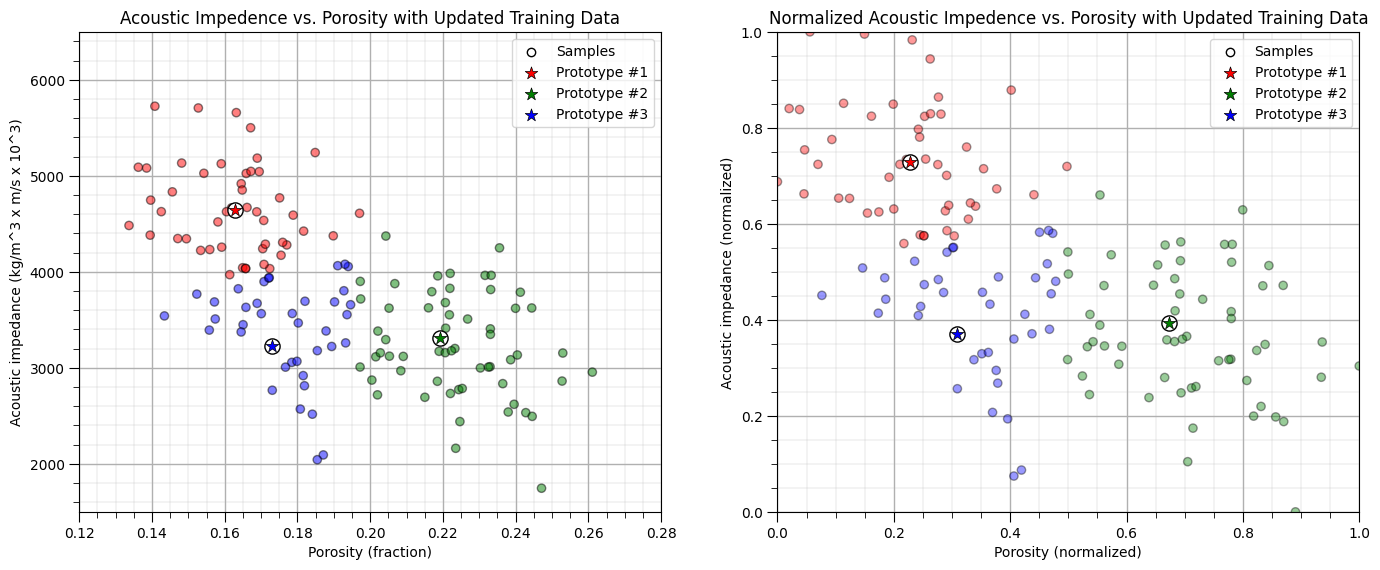

In [14]:
assignment(df, centroids)                                     # assign samples to nearest prototype

plt.subplot(121)                                              # plot the assigned training data and K prototypes
plt.scatter(df['Porosity'], df['AI'], color=df['color'], alpha=0.5, edgecolor='k'); plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
plt.title('Acoustic Impedence vs. Porosity with Updated Training Data'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

plt.subplot(122)                                              # plot the noramlized training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['color'], alpha = 0.4, linewidths=1.0, edgecolors="black"); plt.scatter(-999,-999,color='white',edgecolors='black',label='Samples')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
plt.title('Normalized Acoustic Impedence vs. Porosity with Updated Training Data'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Iterate Until Convergence 

Now we interate over the the previous set of steps:

* assign the training data to the nearest prototype

* update the prototypes 

We do this until there is no further chance in the category assigned to each of the training data.

Iteration:
2 3 4 5 6 7 8 9 

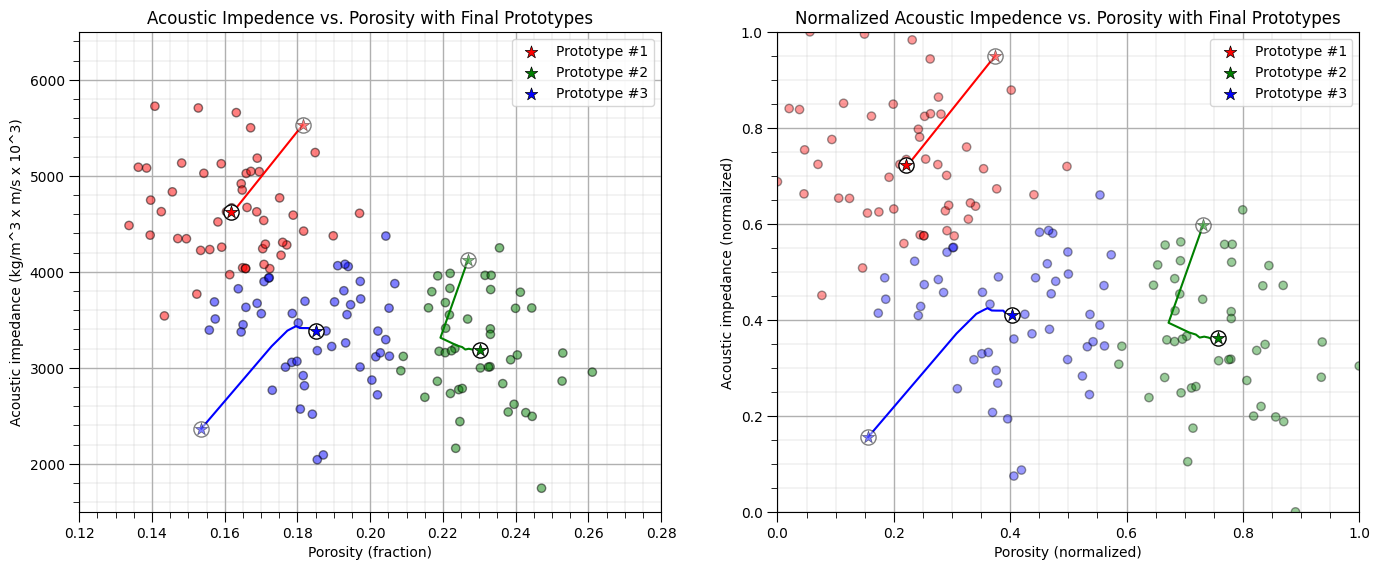

In [15]:
iteration = 2                                                 # unitialize a counter, we already completed iteration 0 and 1 above
print('Iteration:')
while True:
    print(iteration, end =" ")
    closest_centroids = df['closest'].copy(deep=True)
    update(df,centroids,pormin,pormax,AImin,AImax)
    for i in centroids.keys():
        prototypes[i-1,iteration] = [centroids[i][0],centroids[i][1]]
        norm_prototypes[i-1,iteration] = [centroids[i][2],centroids[i][3]]
    assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
    iteration = iteration + 1

plt.subplot(121)                                              # plot the assigned training data and K prototypes
plt.scatter(df['Porosity'], df['AI'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(prototypes[i-1,0,0], prototypes[i-1,0,1],color='white',s=120,marker='o',linewidths=1.0,alpha=0.5,edgecolors="black",zorder=10)
    plt.scatter(prototypes[i-1,0,0], prototypes[i-1,0,1],color=colmap[i],s=90,marker='*',linewidths=0.5,alpha=0.5,edgecolors="black",zorder=20)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
    plt.plot(prototypes[i-1,:iteration+1,0],prototypes[i-1,:iteration+1,1],color=colmap[i],zorder = 1)
plt.title('Acoustic Impedence vs. Porosity with Final Prototypes'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Acoustic impedance (kg/m^3 x m/s x 10^3)')
plt.xlim(por_min, por_max); plt.ylim(AI_min, AI_max); add_grid(); plt.legend(loc='upper right')

plt.subplot(122)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['color'], alpha = 0.4, linewidths=1.0, edgecolors="black")
for i in centroids.keys():
    plt.scatter(norm_prototypes[i-1,0,0], norm_prototypes[i-1,0,1],color='white',s=120,marker='o',linewidths=1.0,alpha=0.5,edgecolors="black",zorder=10)
    plt.scatter(norm_prototypes[i-1,0,0], norm_prototypes[i-1,0,1],color=colmap[i],s=90,marker='*',linewidths=0.5,alpha=0.5,edgecolors="black",zorder=20)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=10)
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3],color=colmap[i],s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=20,label='Prototype #'+str(i))
    plt.plot(norm_prototypes[i-1,:iteration+1,0],norm_prototypes[i-1,:iteration+1,1],color=colmap[i],zorder = 1)
plt.title('Normalized Acoustic Impedence vs. Porosity with Final Prototypes'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid(); plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Clustering with scikit-learn function

Let's repeat with the scikit-learn function.

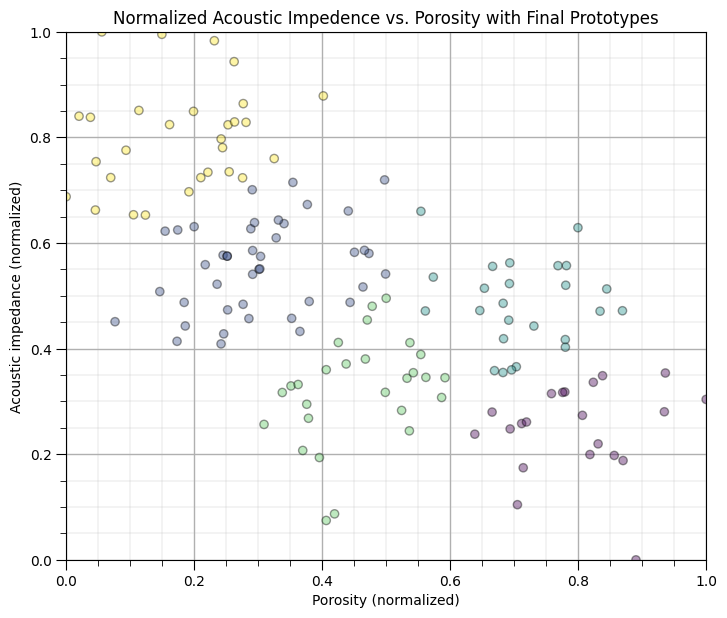

In [16]:
from sklearn.cluster import KMeans                            # k-means clustering

K = 5                                                         # number categories / clusters 

kmeans = KMeans(n_clusters=K, random_state=seed, n_init = 100).fit(df.loc[:,['Norm_Porosity','Norm_AI']]) # k-means clustering
df['kMeans'] = kmeans.labels_ + 1

plt.subplot(111)                                              # plot the training data and K prototypes
plt.scatter(df_subset['Norm_Porosity'], df['Norm_AI'], c=df['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Normalized Acoustic Impedence vs. Porosity with Final Prototypes'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Acoustic impedance (normalized)')
plt.xlim([0, 1]); plt.ylim([0, 1]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Selecting the Optimum Number of Clusters

One method to assist with selection of the optimum number of clusters is the elbow method.

* calculate the loss function for a range of k = 1,...,K cases and look for an inflection point, rapid reduction in slope.

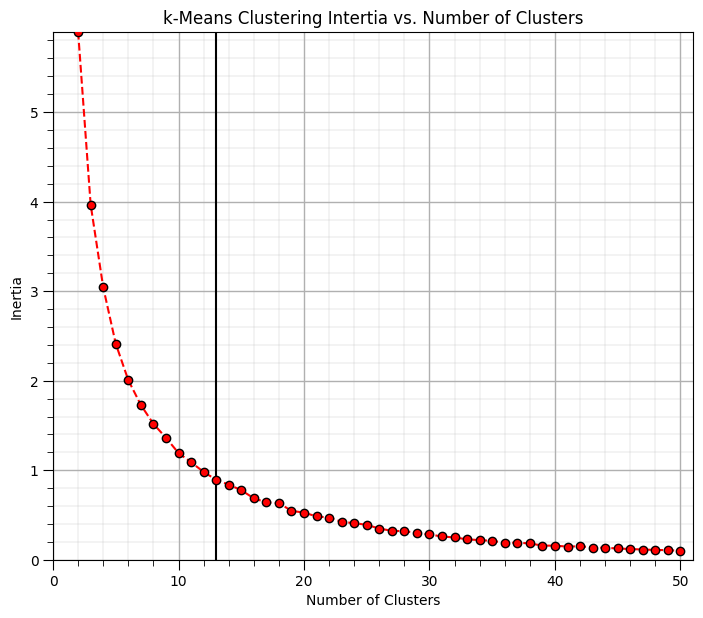

In [17]:
max_K = 50                                                    # maximum number of clusters, k

inertia = []
for k in range(2,max_K+1):                                    # loop over number of clusters and store the intertia
    kmeans_iter = KMeans(n_clusters=k, random_state=14, n_init = 10).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values)
    inertia.append(kmeans_iter.inertia_)

plt.scatter(range(2,max_K+1),inertia,c='red',edgecolor='black',zorder=10)
plt.plot(range(2,max_K+1),inertia,c='red',ls='--',zorder=1)
plt.xlim(2,max_K); plt.xlabel('Number of Clusters'); plt.ylabel('Inertia'); plt.ylim(bottom=0)
plt.vlines(13,0,np.max(inertia),color='black'); plt.grid(True); plt.title('k-Means Clustering Intertia vs. Number of Clusters')
plt.xlim([0,max_K+1]); plt.ylim([0, np.max(inertia)]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

#### Comments

There are so many more tests that one could attempt to gain experience with K-means clustering. I'll end here for brevity, but I invite you to continue. Consider, on your own:

* change the number of $K$ prototypes

* apply the original data (no normalization)

* apply other data sets 

* attempting methods with supervised K-means classification.  

I hope you found this tutorial useful. I'm always happy to discuss data analytics, geostatistics, statistical modeling, uncertainty modeling and machine learning,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
